In [46]:
#Predicting likelihood of individuals defaulting on loan. Reducing the risk of default and improving business portofolio.

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import seaborn as sns

In [47]:
#DATASET: https://www.kaggle.com/datasets/kapturovalexander/bank-credit-scoring
df = pd.read_csv("bank.csv", sep=";") #-> SEP digunakan untuk mengseparasi ;

In [48]:
df.head()
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

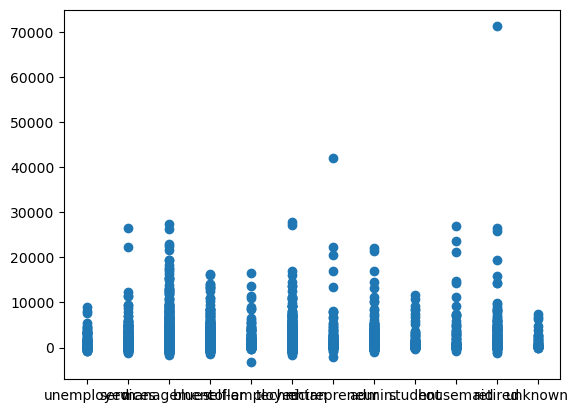

In [49]:
plt.scatter(df["job"], df["balance"])
plt.show()

<Axes: xlabel='loan', ylabel='housing'>

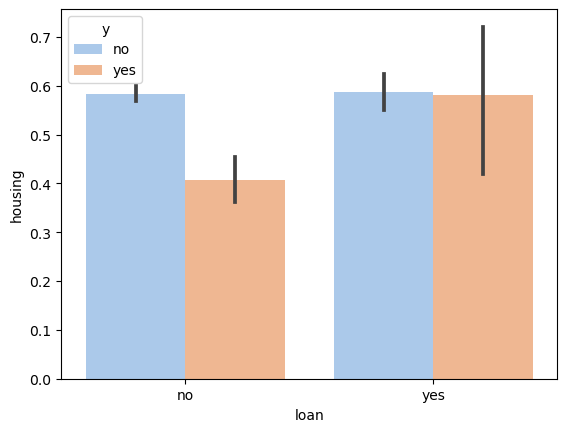

In [50]:
plt.figure()
df["housing"] = df["housing"].astype("category").cat.codes
sns.barplot(x='loan', y='housing', hue='y', data=df, palette="pastel")

<Axes: xlabel='loan', ylabel='campaign'>

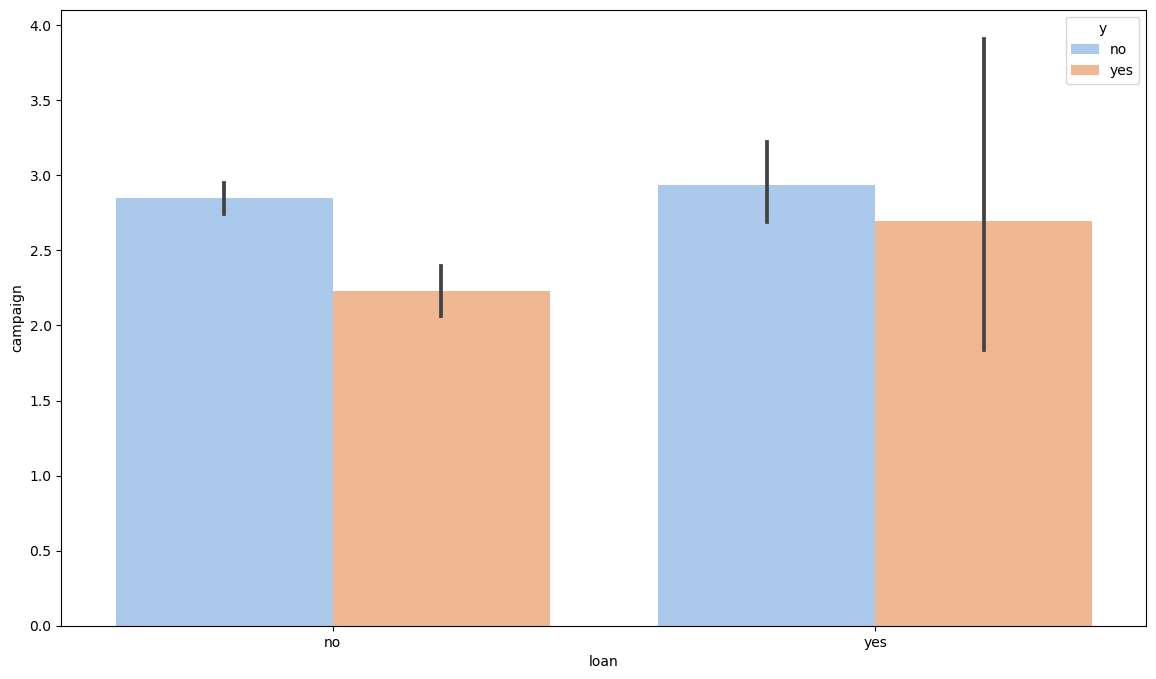

In [51]:
plt.figure(figsize=(14, 8))
sns.barplot(x='loan', y='campaign', hue='y', data=df, palette="pastel")

In [52]:
from sklearn.preprocessing import LabelEncoder


categorical_cols = df.select_dtypes(include=['object']).columns

label_encoder = LabelEncoder()

for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])


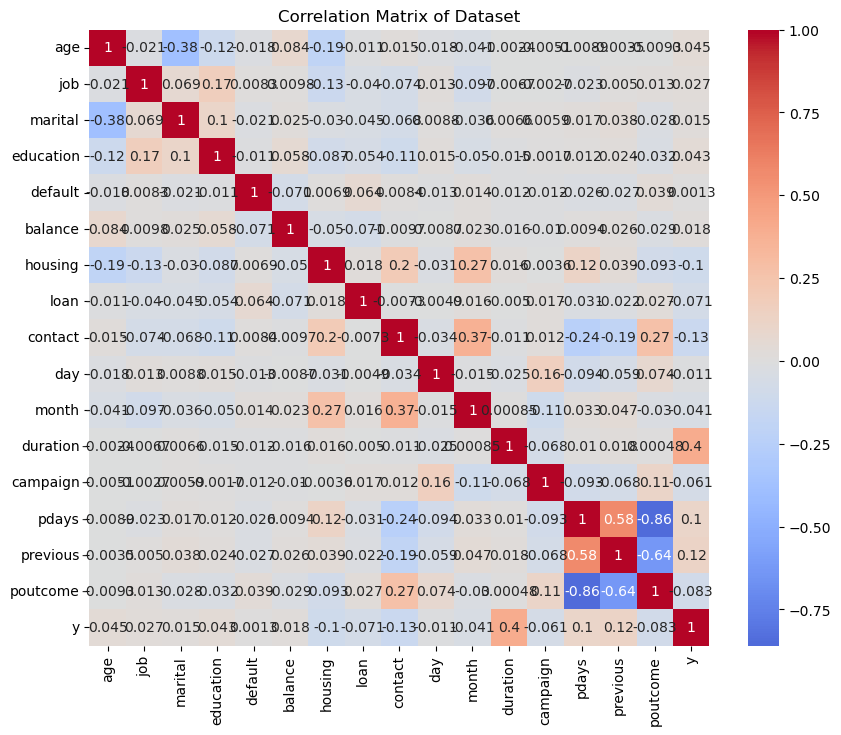

In [53]:
corr_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Dataset')
plt.show()

In [54]:
df["y"] = df["y"].astype("category").cat.codes
print(df["y"].value_counts())

y
0    4000
1     521
Name: count, dtype: int64


In [55]:
y = df['y']
X = df.drop(columns=['y'])

numeric_features = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
categorical_features = ['job', 'marital', 'education', 'housing', 'loan', 'contact', 'month', 'poutcome']

num_transformer = StandardScaler()
cat_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
    ('num', num_transformer, numeric_features),
    ('cat', cat_transformer, categorical_features)
])

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,0
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3,0


In [56]:
#Menggunakan Linear Regression
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'balance', 'duration',
                                                   'campaign', 'pdays',
                                                   'previous']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['job', 'marital',
                                                   'education', 'housing',
                                                   'loan', 'contact', 'month',
                                                   'poutcome'])])),
                ('classifier', LogisticRegression())])

In [57]:
y_pred = model.predict(X_test)

In [58]:
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8968312453942521
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1205
           1       0.57      0.33      0.42       152

    accuracy                           0.90      1357
   macro avg       0.74      0.65      0.68      1357
weighted avg       0.88      0.90      0.88      1357



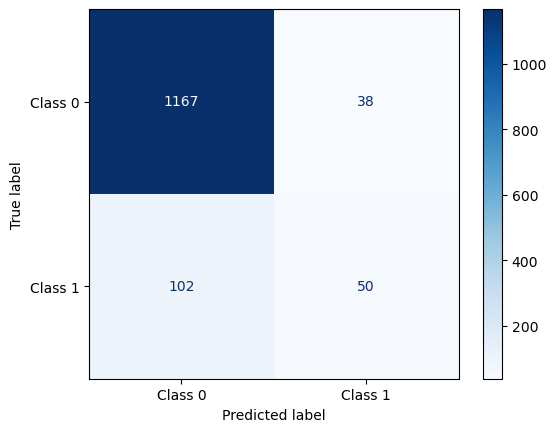

In [59]:
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])

# Plot confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [60]:
#Menggunakan random forest
df["job"] = df["job"].astype("category").cat.codes
df["education"] = df["education"].astype("category").cat.codes
df["default"] = df["default"].astype("category").cat.codes
df["housing"] = df["housing"].astype("category").cat.codes

X = df[['job', 'education', 'housing', 'default', 'campaign', 'day', 'duration', 'balance', 'pdays']]
y = df['y']

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8872512896094326
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1205
           1       0.49      0.24      0.33       152

    accuracy                           0.89      1357
   macro avg       0.70      0.61      0.63      1357
weighted avg       0.86      0.89      0.87      1357



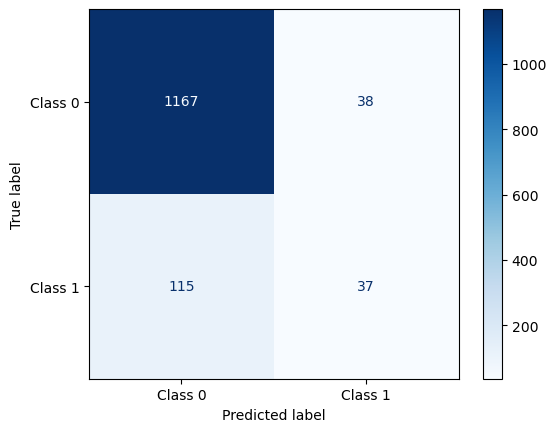

In [62]:
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])

# Plot confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.show()